# White trimmed
Train NTPP and ETAS models on different training set sizes on White et al. catalog (Mc = 0.6)

In [1]:
import torch
import eq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seml
import seaborn as sns

from tqdm.auto import tqdm

## Load NTPP results from the database

In [2]:
df = seml.get_results("eq_trimmed", to_data_frame=True)
df.sort_values(by="config.train_fraction", inplace=True)
df = df.query("`config.dataset_name` == 'White'")

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

In [4]:
df["config.model_name"].value_counts()

RecurrentTPP    50
ETAS            10
Name: config.model_name, dtype: int64

In [5]:
df["num_events_train"] = df["result.num_events_train"] + df["result.num_events_val"]

In [6]:
results = df[["config.model_name", "config.random_seed", "num_events_train", "result.final_nll_test"]]
results.columns = ["model_name", "random_seed", "num_events_train", "nll_test"]

In [7]:
results["loglike_test"] = -results["nll_test"]
results.reset_index(drop=True, inplace=True)

/tmp/ipykernel_2907646/1977214474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["loglike_test"] = -results["nll_test"]


In [8]:
results.to_csv("../../results/White_trimmed.csv")

## Visualize the results

In [9]:
results = pd.read_csv("../../results/White_trimmed.csv", index_col=0)

<AxesSubplot:xlabel='num_events_train', ylabel='loglike_test'>

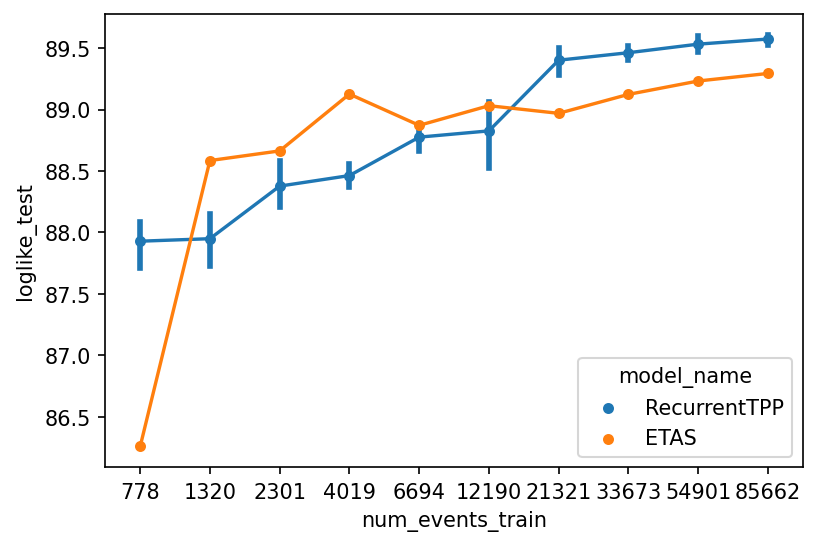

In [10]:
plt.figure(dpi=150)
sns.pointplot(data=results, x="num_events_train", y="loglike_test", hue="model_name", scale=0.6)